# Simple Linear Regression

In [39]:
# Importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# Reading the dataset
wine_quailty = pd.read_csv('./Datasets/winequality-red.csv')

In [5]:
wine_quailty

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


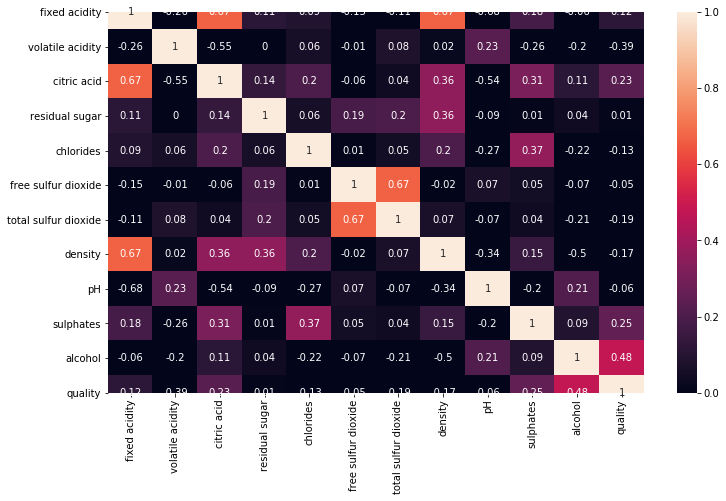

In [41]:
# Checking the correlation between the features
fig, ax = plt.subplots(figsize = (12,7))

corr_matrix = wine_quailty.corr().round(2)
sns.heatmap(data = corr_matrix , vmin = 0, vmax = 1, annot = True);

# sns.pairplot(wine_quailty)

# sns.heatmap(wine_quailty.corr(), annot = True, vmin = 0)

In [19]:
X = wine_quailty.iloc[:,:-1]
Y = wine_quailty.iloc[:,-1]

In [18]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [20]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [24]:
print("X_train ", x_train)
print("\n x_test ", x_test)
print("\n y_train ", y_train)
print("\n y_test ", y_test)

X_train        fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493             8.7             0.690         0.31             3.0      0.086   
354             6.1             0.210         0.40             1.4      0.066   
342            10.9             0.390         0.47             1.8      0.118   
834             8.8             0.685         0.26             1.6      0.088   
705             8.4             1.035         0.15             6.0      0.073   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00             1.9      0.058   
1294            8.2             0.635         0.10             2.1      0.073   
860             7.2             0.620         0.06             2.7      0.077   
1459            7.9             0.200         0.35             1.7      0.054   
1126            5.8             0.290         0.26             1.7      0.063   

      free sulfur 

In [25]:
# Modeling our regressor
multiple_regressor = LinearRegression()
multiple_regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Predicting target values
y_pred = multiple_regressor.predict(x_test)
y_pred

array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476,
       5.27928659, 5.03421667, 5.12623347, 5.74534288, 5.68665032,
       6.13959677, 5.23386892, 5.54991474, 5.25825299, 5.44810502,
       6.46828999, 5.15018088, 5.59105157, 6.5560658 , 5.32255751,
       5.3918385 , 5.19610791, 5.94475739, 6.36197631, 5.35484893,
       5.41907575, 6.36483321, 5.35121573, 5.172392  , 6.16987311,
       5.25263058, 5.50657406, 5.75422105, 5.39101712, 5.45331031,
       5.02757499, 6.16173243, 5.68661555, 5.6486077 , 6.165471  ,
       5.52872593, 5.24414488, 6.17724727, 5.16500868, 5.87598332,
       5.81317121, 6.41982782, 5.6059474 , 5.15232137, 5.55634632,
       5.16044852, 5.10449459, 5.58371721, 6.33425313, 4.95134985,
       4.98364804, 6.01041999, 5.40809804, 5.83802638, 5.2486897 ,
       5.60717482, 5.96630957, 5.27619063, 5.30380113, 6.4949309 ,
       5.42033967, 6.34273471, 5.24618531, 6.41317317, 5.31237924,
       6.41746963, 4.74315748, 5.79362039, 5.8283184 , 6.17598

In [28]:
# Creating dataframe to compare Actual and Predicted target values
pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred})

,Actual Value,Predicted Value
803,6,5.346664
124,5,5.056313
350,6,5.664470
682,5,5.464515
1326,6,5.725185
...,...,...
1259,6,5.688153
1295,5,5.232255
1155,5,5.280535
963,6,6.272466


In [37]:
# Printing out the Co-efficients (b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11) and 
# Intercept (c) of our fitted regressor line (b1x1 + b2x2 + b3x3 + b4x4 + b5x5 + b6x6 + b7x7 + b8x8 + b9x9 + b10x10 + b11x11 + c)
print("Intercept : ", multiple_regressor.intercept_, "\t Co-efficent : ", multiple_regressor.coef_)

Intercept :  14.355105195761869 	 Co-efficent :  [ 2.30853339e-02 -1.00130443e+00 -1.40821461e-01  6.56431104e-03
 -1.80650315e+00  5.62733439e-03 -3.64444893e-03 -1.03515936e+01
 -3.93687732e-01  8.41171623e-01  2.81889567e-01]


In [32]:
# Checking the performance of the model
N = len(X)
p = len(wine_quailty.columns) - 1
r2 = metrics.r2_score(y_test, y_pred)

In [33]:
print("RSME : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score : ", metrics.r2_score(y_test, y_pred))
print("Adjusted R2 Score : ", 1 - (((1 - r2) * (N - 1)) / (N - p - 1)))

RSME :  0.6245199307980124
R2 Score :  0.4031803412796231
Adjusted R2 Score :  0.39904359506290965
